This simple linear regresion project is used to predict the salary of workers based on their years of experience.

I have a dataset downloaded from Kaggle.

Now lets read in the dataset and explore

In [95]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

salaries = pd.read_csv('Salary.csv')


In [96]:
salaries.head()  #check the first 5 rows

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [97]:
salaries.info()   #check mor info about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [98]:
salaries.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


The above shows that there are 2 columns and 35 rows in the data set. There are no null values and all values are numeric
We can also see some information about the mean, min and max values as well as some percentiles.
The years of experience in the data set ranges from 1.1 to 13.5 with a mean of about 6.3
The salary ranges from about 37k to 139k

## Some Data Cleaning

For ease of reference, I will change the column names with the code below

In [99]:
salaries.columns = ['years_of_exp', 'salary']
salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   years_of_exp  35 non-null     float64
 1   salary        35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


## Data Visualization

To visualize the dataset, I will create a scatter plot and an histogram

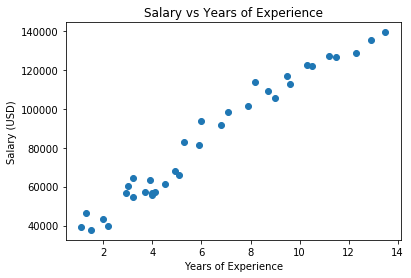

In [100]:
plt.scatter(salaries['years_of_exp'], salaries['salary'])
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (USD)')
plt.show()

The scatter plot shows a pattern, seems like there is a linear relationship between the two variables.

To further test this, we can calculate the correlation between the two variables using Series.corr()

In [101]:
salaries['salary'].corr(salaries['years_of_exp'])

0.9824272546479684

correlation value is very high, 0.98. However, correlation does not imply causation

To further analyse the dataset, I can generate a frequency table and a histogram for both columns 

In [102]:
salaries['salary'].value_counts(normalize = True , bins = 10, ascending = True) * 100


(68251.2, 78424.6]               0.000000
(78424.6, 88598.0]               5.714286
(98771.4, 108944.8]              5.714286
(129291.6, 139465.0]             5.714286
(88598.0, 98771.4]               8.571429
(108944.8, 119118.2]            11.428571
(37629.26500000001, 47904.4]    14.285714
(119118.2, 129291.6]            14.285714
(47904.4, 58077.8]              17.142857
(58077.8, 68251.2]              17.142857
Name: salary, dtype: float64

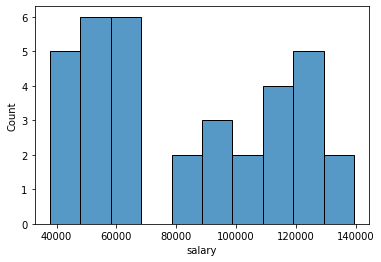

In [103]:
sns.histplot(salaries['salary'], bins = 10)  #seaborn gives better graphics


The frequency table & histogram show that most people in the data set have salaries less than 70k USD

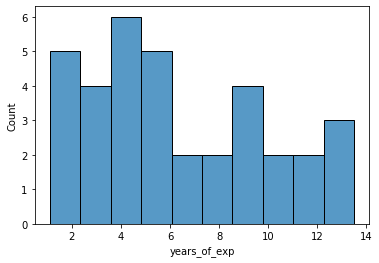

In [104]:
sns.histplot(salaries['years_of_exp'], bins = 10) 

## Machine Learning Model

We can use linear regression algorithm to predict salary using this data set.

Salary - Dependent Variable/Target
Years of Experience - Feature/ Independent variable

### Training & Test Data set

Since there isjust one data set, the first step is to split the data set into:
1. Training dataset: This will be used to train the algorithm & built the ML model.
2. Test Data set: This will be used to the test the model which was built. 

This can be done using the train_test_split function from sklearn.model_selection.
This function is used to split data sets into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually.
By default, Sklearn train_test_split will make random partitions for the two subsets. However, you can also specify a random state for the operation.

train_test_split(X, y, train_size=0.*,test_size=0.*, random_state=*)

X, y -  The first parameter is the dataset you're selecting to use.X is the feature and y is the target

train_size - This parameter sets the size of the training dataset. There are three options: None, which is the default, Int, which requires the exact number of samples, and float, which ranges from 0.1 to 1.0.

test_size - This parameter specifies the size of the testing dataset. The default state suits the training size. It will be set to 0.25 if the training size is set to default.

You can also set random_state to ensure you get the same set everytime 

**Now lets split the data set

In [105]:
X = salaries.drop('salary', axis = 1)
y = salaries['salary']


from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 1)

X_train.size   





24

so we have 24 entries in the train data & 11 in the test

**Now lets fit a Linear Regression Model to the training data set



In [106]:
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression object linregres

linregres = LinearRegression()

#This class has different methods and attributes
#The method which is used to fit & train the linear regression model is the .fit() method

linregres.fit(X_train, y_train)






LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [107]:
# We can get the parameters using the .coef_ (for the slope) and .intercept_ (for the intercept)

slope = linregres.coef_
intercept = linregres.intercept_

print(slope, intercept)

[8803.14905288] 28017.234296906216


In [108]:
# So, our fitted regression line is 

# y = 28017.23 * 8803.14X 

#### Now lets predict & test the model

The .predict() method is used for this

In [109]:
predictions = linregres.predict(X_test)   #This gives an array of predicted values for the salary based X_test
predictions

array([ 67631.40503486,  80836.12861418,  45623.53240266, 120450.29935213,
       141577.85707904, 118689.66954156,  97562.11181465, 112527.46520454,
       111647.15029926, 136295.96764732,  74673.92427716])

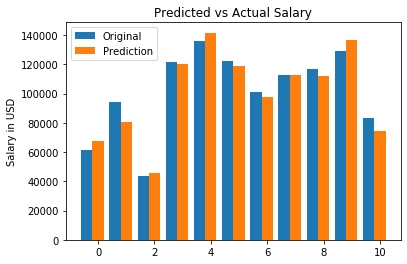

In [110]:
#now that we have used X_test to get new values for target y. How do we compare this predicted y to the y_test?

#Since the values are small in quantitiy (11), I can create a line plot to compare the two values 

r = np.arange(len(y_test))
width = 0.4


plt.bar(r - 0.4, y_test, label = 'Original', width = width)
plt.bar(r, predictions, label = 'Prediction', width = width)
plt.legend()
plt.title ('Predicted vs Actual Salary')
plt.ylabel('Salary in USD')
plt.show()



The grouped bar chart generated abov shows that most of the actual values and predicted values are quite close to each other. 

##### Now lets try to fit a line 

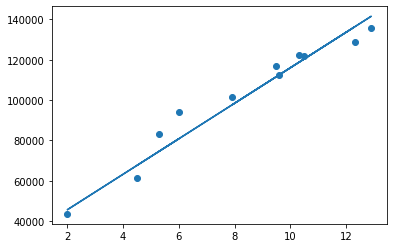

In [111]:
plt.scatter(X_test, y_test) # scatter plot will represent actual values 
plt.plot(X_test, predictions) # line plot will represent our lin regression line
plt.show()

### Evaluating Model

#### Residual Plot

I will first evaluate the accuracy of this model( or check if a linear regression model is good for by data) by generating a residual plot.

Residual value = Actual Value - Predicted Value 

In this case; Residual Value = y_test - predictions

I will create an array for residual values and then plot it against the predictions on a scatter plot

*you should actually do this before you even try to get a line of fit

I will use the seaborn.residplot() to plot the residuals of this linear regression model.

Syntax: seaborn.residplot(x, y, data=None, lowess=False, x_partial=None, y_partial=None, order=1,
   robust=False, dropna=True, label=None, color=None, scatter_kws=None, line_kws=None, ax=None)

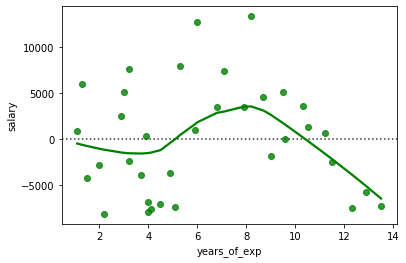

In [112]:
sns.residplot(x=X, y=y, lowess=True, color="g")
plt.show()

some points are close to the origin, some other points are really far away.
Overall, the dataset is not ideal, but it can be used.

#### Model Evaluation

Now after observing and confirming a linear regressionmodel is fit for the data, from the residual plot, I can now evaluate the performance of the model using RMSE and R2 Score

#### RMSE

RMSE gives us the standard deviation of the unexplained variance (SD of the residuals). It can be calculated by taking square root of Mean Squared Error. 
It tells us how spread the residuals are, given by the standard deviation of the residuals. The more concentrated the data is around the regression line, the lower the residuals and hence lower the standard deviation of residuals. It results in lower values of RMSE. So, lower values of RMSE indicate better fit of data.

In [113]:
# To calculate the Root Mean Square Error(RMSE), I will use the mean_squared_error function from sklearn.metrics

#syntax: sklearn.metrics.mean_squared_error(y_true, y_pred, *, sample_weight=None, multioutput='uniform_average', squared=True)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print(f"RMSE value: {rmse}") 

RMSE value: 6317.568019802611


The RMSE value for the model is 6317.5. Comparing this the residual plot generated above, it is just fair. It means that most of the data is pread around by 6317. 

#### R2 SCORE

R2 Score, also called coefficient of determination, is another metric to evaluate performance of a regression model. . It gives us an idea of goodness of fit for the linear regression models. It indicates the percentage of variance in the dependent variable (y) that can be explained by the model (or independent variable).

R2 Score = 1 - (Unexplained Variation/Total Variation)

In general, the higher the R2 Score value, the better the model fits the data. Usually, its value ranges from 0 to 1. So, we want its value to be as close to 1.

In [114]:
# To calculate the R2 Score), I will use the r2_score function from sklearn.metrics

#syntax: sklearn.metrics.r2_score(y_true, y_pred, sample_weight=None)

from sklearn.metrics import r2_score
r2_s = r2_score(y_test, predictions)

print(f"R2 score value: {r2_s}") 

R2 score value: 0.948425676671226


Our R2 score is 0.948, which means that slightly above 94% of the variations in the predicted salaries can be explained the model. The higher the R2_score, the better